In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control as ct

plt.style.use('../maroon_ipynb.mplstyle')

This is an extension to Example 2.5.1 in the book. This is how you get the response to a system that has multiple inputs. You add the forced response from each input function. For this example, the first input is $f(t)=t^2$, and the second input is $g(t)=e^{-5t}$.

In [2]:
t = sp.Symbol('t')
x = sp.Function('x')(t)
f = t**2
g = sp.exp(-5*t)

eq = sp.Eq(5*x.diff(t, 2) + 30*x.diff() + 40*x, 6*f - 20*g)
eq

Eq(40*x(t) + 30*Derivative(x(t), t) + 5*Derivative(x(t), (t, 2)), 6*t**2 - 20*exp(-5*t))

In [3]:
sol = sp.dsolve(eq, ics={
    x.subs(t, 0): 0,
    x.diff().subs(t, 0): 0
})
sol

Eq(x(t), 3*t**2/20 - 9*t/40 + 21/160 - 49*exp(-2*t)/60 + 323*exp(-4*t)/160 - 4*exp(-5*t)/3)

In [4]:
x_lamb = sp.lambdify(t, sol.rhs, modules='numpy')
t_ = np.linspace(0, 10, 500)

den = [5, 30, 40]  # all transfer functions have the same denominator (characteristic equation)
X_F = ct.tf(6, den)
X_G = ct.tf(-20, den)
display(X_F, X_G)

TransferFunction(array([6]), array([ 5, 30, 40]))

TransferFunction(array([-20]), array([ 5, 30, 40]))

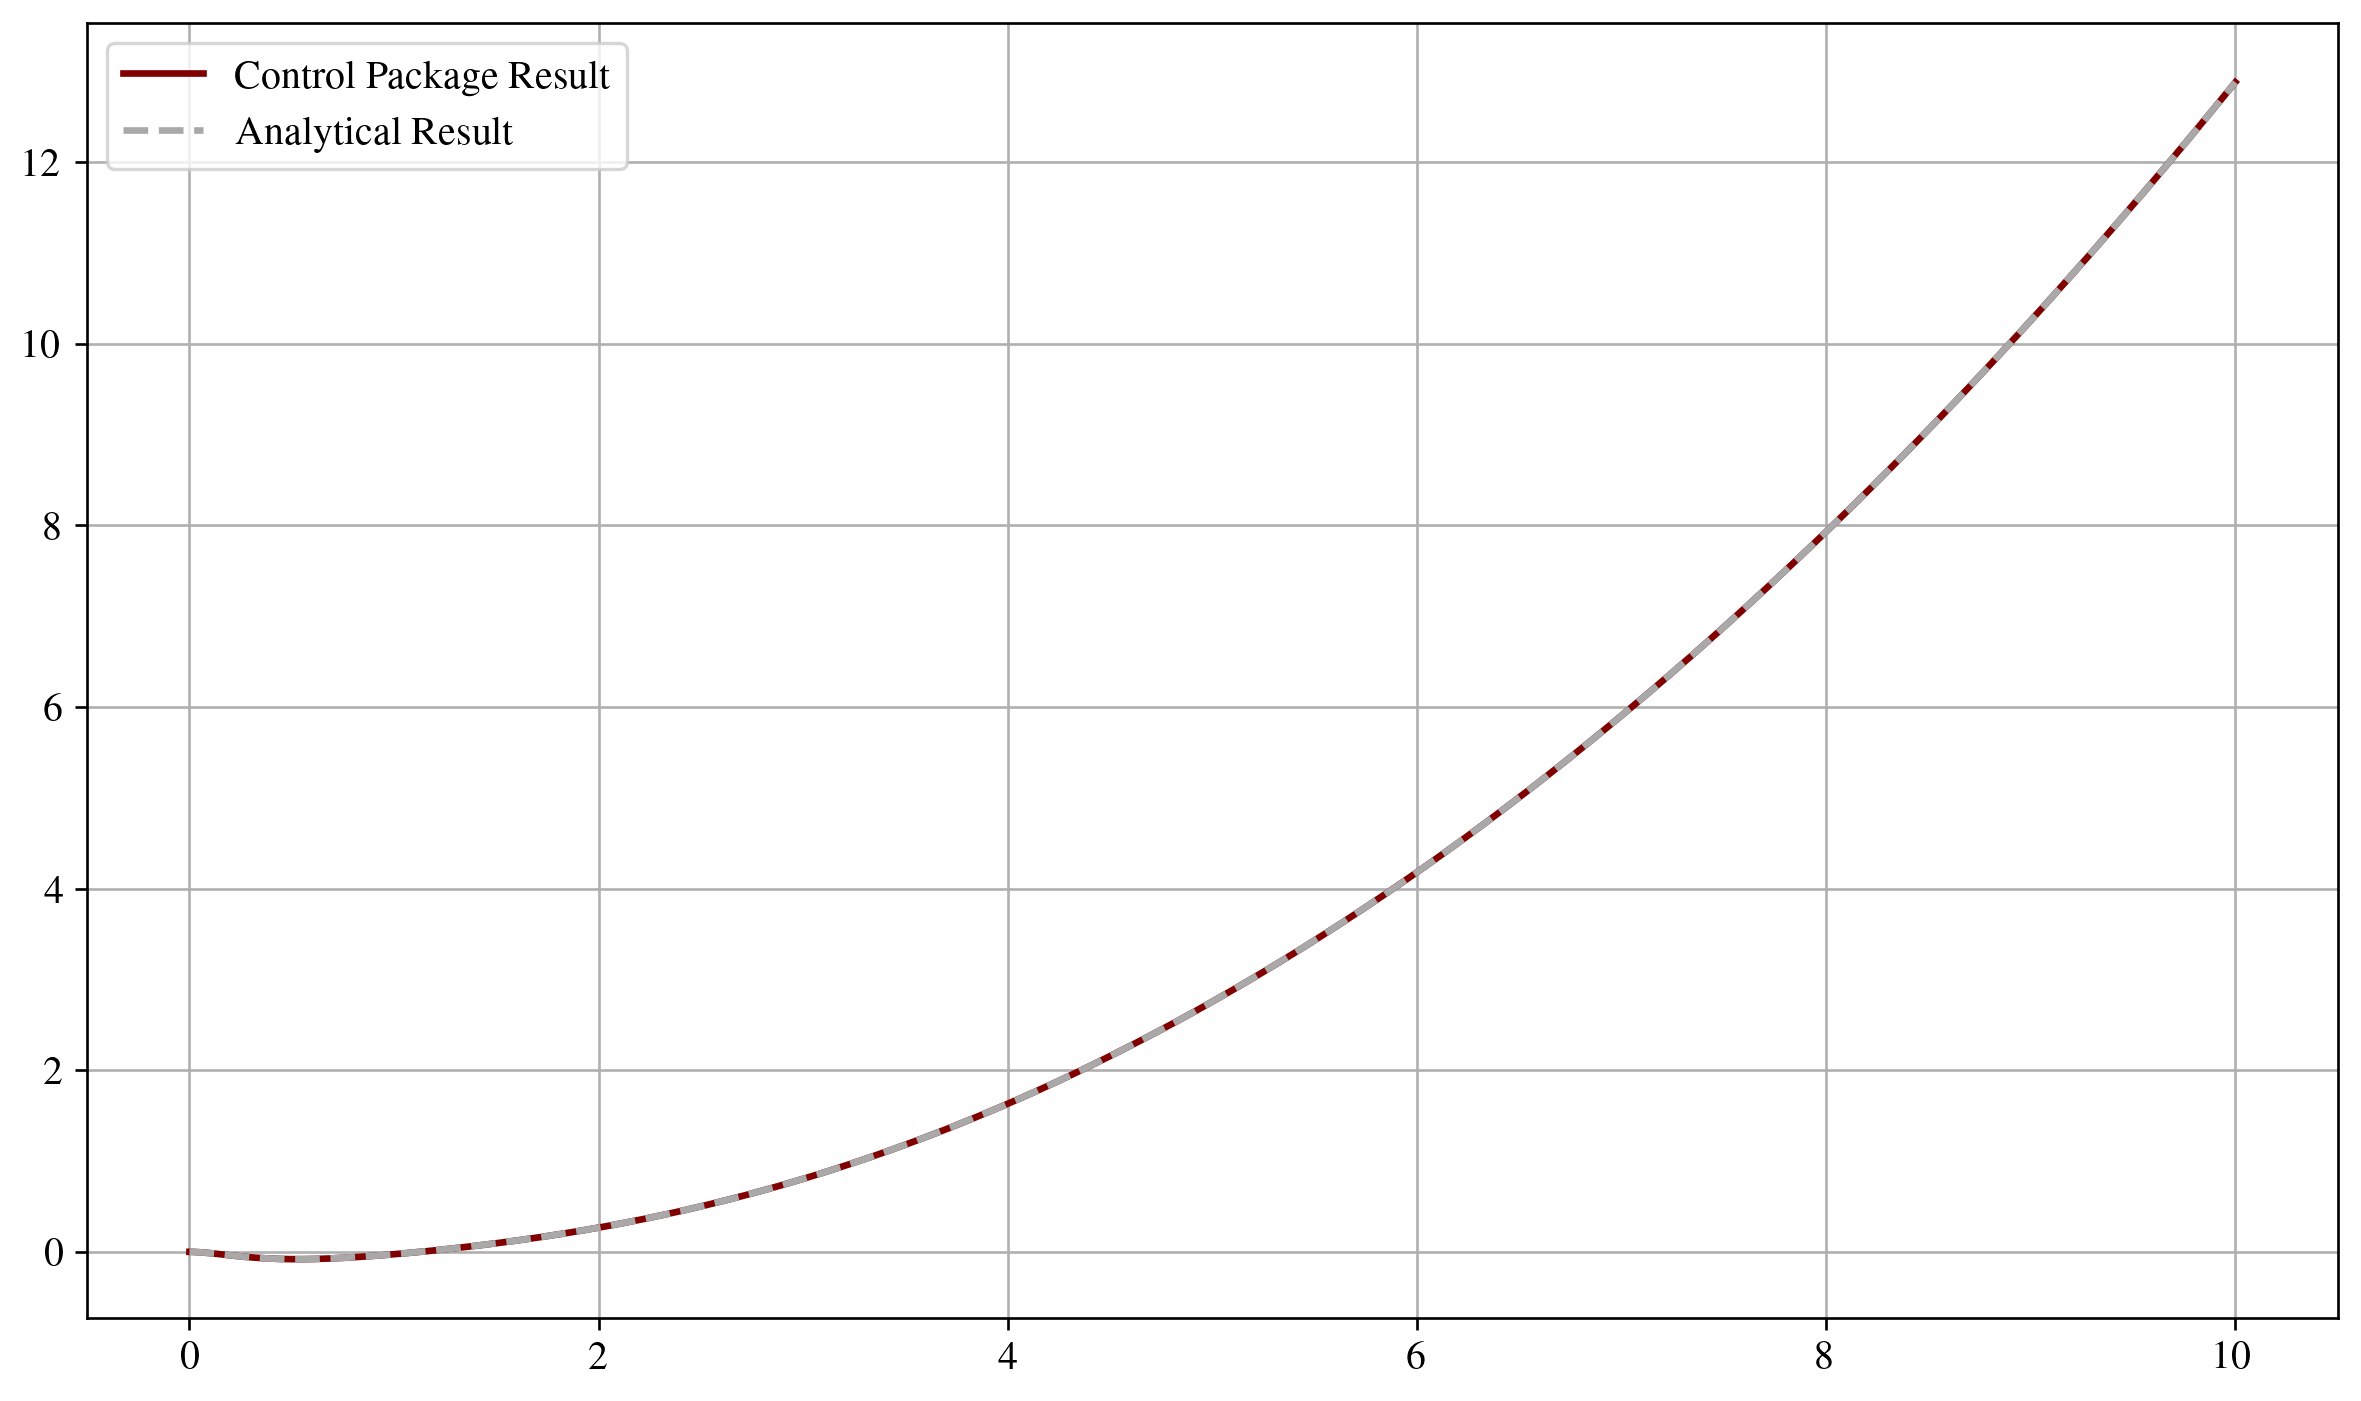

In [5]:
_, f_response = ct.forced_response(X_F, T=t_, U=t_**2)
_, g_response = ct.forced_response(X_G, T=t_, U=np.exp(-5*t_))
response = f_response + g_response

plt.plot(t_, response, label='Control Package Result')
plt.plot(t_, x_lamb(t_), label='Analytical Result', ls='--', color='darkgrey')
plt.legend()
plt.show()